# Exploring Dandiset 001361: A flexible hippocampal population code for experience relative to reward

---

**AI-generated caution:**  
This notebook was generated by AI and has not been fully verified by a human. Please use caution when interpreting code or results—check details and logic before drawing firm conclusions or using for research!

---

## Overview

**Dandiset Name:** A flexible hippocampal population code for experience relative to reward  
**Identifier:** DANDI:001361/0.250406.0045  
**Link to Dandiset:** [https://dandiarchive.org/dandiset/001361/0.250406.0045](https://dandiarchive.org/dandiset/001361/0.250406.0045)

**Citation:**  
Sosa, Marielena; Plitt, Mark H.; Giocomo, Lisa M. (2025) A flexible hippocampal population code for experience relative to reward (Version 0.250406.0045) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001361/0.250406.0045

**Contributors:** National Institutes of Health (NIH), Sosa, Marielena, Plitt, Mark H., Giocomo, Lisa M.

**Description:**  
2-photon imaging and behavioral data from hippocampal area CA1 during virtual reality navigation in mice. Included in Sosa, Plitt, & Giocomo, "A flexible hippocampal population code for experience relative to reward," Nature Neuroscience.

The data includes:
- Processed and raw two-photon imaging
- Accompanying behavioral time series (reward delivery, licking, position, trial events)

**Keywords:** hippocampus, navigation, learning, memory, 2-photon imaging, place cells

---

## What will this notebook cover?

- Show how to explore assets in this Dandiset
- Load an NWB file and examine its structure
- Summarize and visualize behavioral and imaging data
- Provide guidance for working with this data and direct links for further exploration
- Offer suggestions for future analyses

---

## Required packages

_These Python packages are required and are assumed to already be installed:_

- numpy
- matplotlib
- pandas
- pynwb
- h5py
- remfile

_If needed, install with pip in your own environment. No installation commands are included here._

---

In [1]:
# List some assets in the Dandiset using the DANDI API
from itertools import islice
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("001361", "0.250406.0045")

metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List first 5 assets
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: A flexible hippocampal population code for experience relative to reward
Dandiset URL: https://dandiarchive.org/dandiset/001361/0.250406.0045

First 5 assets:
- sub-m11/sub-m11_ses-05_behavior+ophys.nwb (ID: a22cc1da-b5e8-4fea-a770-7b83a6e79656)
- sub-m11/sub-m11_ses-04_behavior+ophys.nwb (ID: b53ef825-89ca-483e-abeb-b38a0ae9293c)
- sub-m11/sub-m11_ses-07_behavior+ophys.nwb (ID: 27481b95-aeb2-4108-b7ac-b3859892da7a)
- sub-m11/sub-m11_ses-06_behavior+ophys.nwb (ID: 5a5da0ea-5e7a-497b-a3aa-7e6ee1628bde)
- sub-m11/sub-m11_ses-08_behavior+ophys.nwb (ID: d4e069d6-40f6-4702-92d4-70abfd65c1bd)


---

## Selecting an NWB file to explore

For illustration, we will work with the following NWB file:

- **Path:** `sub-m11/sub-m11_ses-03_behavior+ophys.nwb`
- **Asset ID:** d77ea78a-8978-461d-9d11-3c5cef860d82  
- **Download URL:**  
  `https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/`

You can also view this file online at Neurosift:
[Explore NWB file on neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/&dandisetId=001361&dandisetVersion=draft)

---

## Loading the NWB file
The following code shows how to load the NWB file using `pynwb` and `remfile`.  
(Data is streamed directly from DANDI's servers.)

In [2]:
import pynwb
import h5py
import remfile

nwb_url = "https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/"
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print("Session description:", nwb.session_description)
print("Subject ID:", nwb.subject.subject_id)
print("Session start time:", nwb.session_start_time)
print("Experimenter:", nwb.experimenter)

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: processed suite2p data
Subject ID: m11
Session start time: 2023-02-23 00:00:00-08:00
Experimenter: ('Mari Sosa',)


---
## NWB File Structure Overview

The selected NWB file contains:

```
NWBFile
├─ session_description: processed suite2p data
├─ subject: m11 (Mus musculus, M)
├─ acquisition
│   └─ TwoPhotonSeries: 2-photon imaging voltage (shape: (1, 1, 1), rate: 15.5 Hz)
├─ processing
│   ├─ behavior (BehavioralTimeSeries)
│   │   └─ TimeSeries: Reward, autoreward, environment, lick, position, reward_zone, scanning, speed, teleport, trial number, trial_start
│   ├─ ophys (optical physiology, Suite2p-processed ROIs and signals)
│   │   ├─ Backgrounds_0 (Images): Vcorr, max_proj, meanImg
│   │   ├─ Deconvolved (Fluorescence): plane0 (19818 frames, 349 ROIs)
│   │   ├─ Fluorescence: plane0 (19818 frames, 349 ROIs)
│   │   ├─ Neuropil: plane0 (19818 frames, 349 ROIs)
│   │   └─ ImageSegmentation (PlaneSegmentation, ROIs)
├─ imaging_planes (1): hippocampus, CA1
└─ devices: Neurolabware microscope
```

**Key behavioral signals:** `position`, `lick`, `reward`, `speed`, `trial_start`, etc.  
**Optical signals:** Processed fluorescence traces, deconvolved traces, and segmentation masks for ROIs.

---
### Behavioral time series overview

These time series are stored under:
```
nwb.processing['behavior'].data_interfaces['BehavioralTimeSeries'].time_series
```
The following time series are available:

- Reward
- autoreward
- environment
- lick
- position
- reward_zone
- scanning
- speed
- teleport
- trial number
- trial_start

Let's list the number of samples for each and preview some example data.

In [3]:
import numpy as np
ts = nwb.processing['behavior'].data_interfaces['BehavioralTimeSeries'].time_series

# For display
series_names = list(ts.keys())
sample_counts = {name: ts[name].data.shape[0] for name in series_names}

import pandas as pd
sample_tbl = pd.DataFrame({
    'Signal': list(sample_counts.keys()),
    'n_samples': list(sample_counts.values()),
    'Units': [ts[name].unit for name in series_names],
    'Description': [ts[name].description for name in series_names],
})

display(sample_tbl)

,Signal,n_samples,Units,Description
0,Reward,69,mL,reward delivery
1,autoreward,20684,integer,whether trial was automatically rewarded if th...
2,environment,20684,AU,Virtual reality environment
3,lick,20684,AU,"lick detection by capacitive sensor, cumulativ..."
4,position,20684,cm,Position in a virtual linear track
5,reward_zone,20684,integer,reward zone entry (binary)
6,scanning,20684,integer,whether scanning occurred to collect ophys data
7,speed,20684,cm/s,the speed of the subject measured over time
8,teleport,20684,integer,"end of a trial, i.e. entry into the intertrial..."
9,trial number,20684,integer,"trial number, where each trial is a lap of the..."


---
### Plotting position and speed for the first lap

Let's visualize the animal's movement (position and speed) for a short time interval (first 1000 samples):

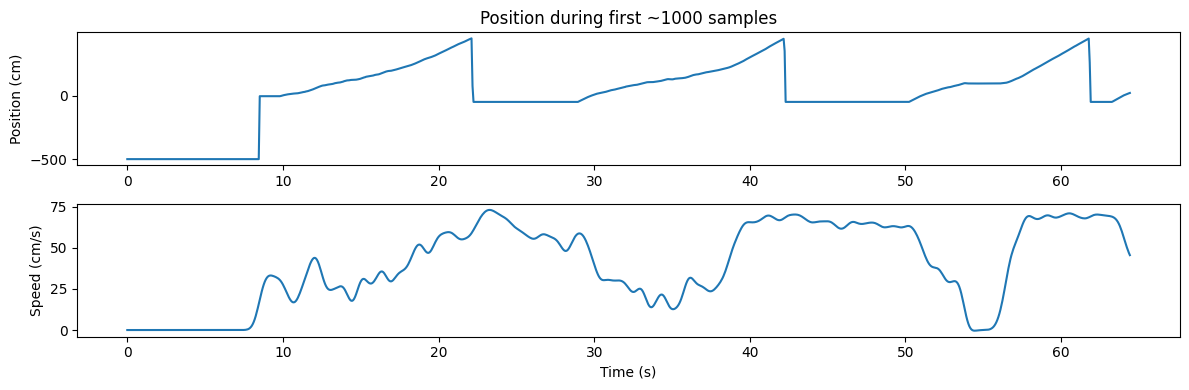

In [4]:
import matplotlib.pyplot as plt

idx = slice(0, 1000)
time = ts['position'].timestamps[idx]
position = ts['position'].data[idx]
speed = ts['speed'].data[idx]

plt.figure(figsize=(12, 4))
plt.subplot(2,1,1)
plt.plot(time, position)
plt.ylabel('Position (cm)')
plt.title('Position during first ~1000 samples')
plt.subplot(2,1,2)
plt.plot(time, speed)
plt.ylabel('Speed (cm/s)')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()

---
## Ophys fluorescence & ROI exploration

Suite2p-processed ROI time series are found under `nwb.processing['ophys']`.

There are two types of ROI signals:
- **Fluorescence:** Raw signals (plane0)
- **Deconvolved:** Denoised events (plane0)

Each array is (n_frames, n_rois). Let's plot traces for the first 5 ROIs:

In [5]:
# Load fluorescence traces and plot for 5 example ROIs
fluo = nwb.processing['ophys'].data_interfaces['Fluorescence'].roi_response_series['plane0'].data
decov = nwb.processing['ophys'].data_interfaces['Deconvolved'].roi_response_series['plane0'].data

times = np.arange(fluo.shape[0]) / ts['position'].timestamps_unit if hasattr(ts['position'], 'timestamps_unit') else np.arange(fluo.shape[0])

plt.figure(figsize=(12,5))
for i in range(5):
    plt.plot(fluo[:, i] + 2*i, label=f'ROI {i}')
plt.xlabel('Frame')
plt.ylabel('Fluorescence (a.u.) (offset for clarity)')
plt.title('Example raw fluorescence traces for 5 ROIs')
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
for i in range(5):
    plt.plot(decov[:, i] + 2*i, label=f'ROI {i}')
plt.xlabel('Frame')
plt.ylabel('Deconvolved (a.u.) (offset for clarity)')
plt.title('Example deconvolved event traces for 5 ROIs')
plt.legend()
plt.show()

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

---
### Exploring ROI segmentation

ROI segmentation is stored in a PlaneSegmentation table:
```
plane_seg = nwb.processing['ophys'].data_interfaces['Fluorescence'].roi_response_series['plane0'].rois.table
```
This can be converted to a pandas DataFrame for exploration:

- `pixel_mask`: pixels contributing to the ROI
- `iscell`: whether the ROI was identified as a cell or not
- `planeIdx`: recording plane

Let's look at the first 5 ROIs:

In [6]:
plane_seg = nwb.processing['ophys'].data_interfaces['Fluorescence'].roi_response_series['plane0'].rois.table
df_roi = plane_seg.to_dataframe()
display(df_roi.head())

,pixel_mask,iscell,planeIdx
id,,,
0,"[[136, 471, 11.239327], [136, 472, 12.38877], ...","[0.0, 0.49814834778690403]",0
1,"[[164, 400, 15.628908], [164, 401, 17.650463],...","[0.0, 0.8500147314559483]",0
2,"[[209, 552, 16.836023], [209, 553, 18.55048], ...","[1.0, 0.6779582307988627]",0
3,"[[161, 537, 13.172347], [161, 538, 12.249123],...","[1.0, 0.8864013707883429]",0
4,"[[148, 458, 13.488646], [148, 459, 21.197554],...","[1.0, 0.870102957697157]",0


---
### Visualizing an ROI mask (for the first ROI)

The ROI pixel_mask lists pixels (row, col, weight) as a list for each ROI.
Let's view the mask for ROI 0 as an image.

In [7]:
# Determine shape from imaging plane
im_shape = [int(x) for x in plane_seg.imaging_plane.grid_spacing[:]]
roi_mask = np.zeros(im_shape)
for row, col, weight in df_roi.iloc[0]['pixel_mask']:
    roi_mask[int(row), int(col)] = weight

plt.imshow(roi_mask, cmap='hot')
plt.title('Pixel mask for ROI 0')
plt.colorbar(label='Weight')
plt.axis('off')
plt.show()

IndexError: index 136 is out of bounds for axis 0 with size 2

---
### Advanced visualization: Population activity heatmap

Let's visualize normalized population activity (fluorescence) for the first 50 ROIs and 500 frames:

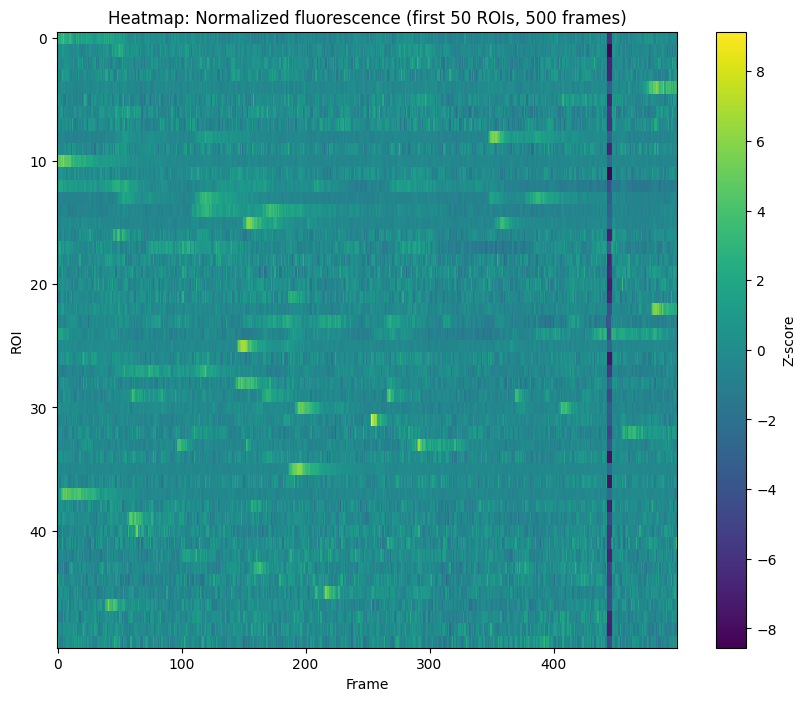

In [8]:
z_fluo = (fluo[:500, :50] - np.mean(fluo[:500, :50], axis=0)) / (np.std(fluo[:500, :50], axis=0) + 1e-6)
plt.figure(figsize=(10, 8))
plt.imshow(z_fluo.T, aspect='auto', cmap='viridis', interpolation='nearest')
plt.xlabel('Frame')
plt.ylabel('ROI')
plt.title('Heatmap: Normalized fluorescence (first 50 ROIs, 500 frames)')
plt.colorbar(label='Z-score')
plt.show()

---
## Summary and future directions

This notebook demonstrated how to explore the structure and basic contents of a two-photon imaging/behavioral NWB file in Dandiset 001361.  
You have seen how to:
- List and examine assets from the Dandiset
- Load and inspect NWB file structure and contents using `pynwb`
- Explore and visualize behavioral and calcium imaging time series
- Visualize ROI segmentations and masks

**Next steps and possible analyses:**
- Explore additional behavioral correlates (licking, trial outcomes, reward location)
- Identify place cells or analyze population code stability across reward switches
- Correlate movement, events, and ROI fluorescence over trials or laps
- Work with other NWB files in the Dandiset for comparison/reproducibility

For further exploration, you can browse additional assets and explore files online at Neurosift ([link](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/&dandisetId=001361&dandisetVersion=draft)).

Happy analyzing!